<a href="https://colab.research.google.com/github/yehezkielesmjtk/i-recycle_model/blob/main/ResNet50_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"deboranim3192859","key":"8522d9a19082cb8c1ac7fbbe837b2686"}'}

In [2]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [3]:
!kaggle datasets download -d mostafaabla/garbage-classification

 92% 221M/239M [00:02<00:00, 90.7MB/s]
100% 239M/239M [00:02<00:00, 101MB/s] 


In [4]:
!unzip -q garbage-classification.zip -d .

In [5]:
import os

battery_dir = os.path.join('garbage_classification/battery')
biological_dir = os.path.join('garbage_classification/biological')
brownglass_dir = os.path.join('garbage_classification/brown-glass')
cardboard_dir = os.path.join('garbage_classification/cardboard')
clothes_dir = os.path.join('garbage_classification/clothes')
greenglass_dir = os.path.join('garbage_classification/green-glass')
metal_dir = os.path.join('garbage_classification/metal')
paper_dir = os.path.join('garbage_classification/paper')
plastic_dir = os.path.join('garbage_classification/plastic')
shoes_dir = os.path.join('garbage_classification/shoes')
trash_dir = os.path.join('garbage_classification/trash')
whiteglass_dir = os.path.join('garbage_classification/white-glass')

In [6]:
from sklearn.model_selection import train_test_split
from keras.preprocessing import image
import numpy as np

list_dir = [battery_dir, biological_dir, brownglass_dir, cardboard_dir, clothes_dir, greenglass_dir, metal_dir, 
            paper_dir, plastic_dir, shoes_dir, trash_dir, whiteglass_dir]
test_split = 0.2
val_split = 0.2

x_fname = []
y_data = []

for i in range(len(list_dir)):
  temp = os.listdir(list_dir[i])
  temp = [os.path.join(list_dir[i], fname) for fname in temp]
  x_fname.extend(temp)
  y_data.extend([i] * len(os.listdir(list_dir[i])))

x_data = x_fname

x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=test_split
)

if val_split is not None:
  x_train, x_val, y_train, y_val = train_test_split(
      x_train, y_train, test_size=val_split/(1-test_split)
  )

In [7]:
from shutil import copy

train_dir = '/tmp/train/'
test_dir = '/tmp/test/'
val_dir = '/tmp/validation/'

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

categories = ['battery', 'biological', 'brown-glass', 'cardboard', 'clothes', 'green-glass', 'metal',
              'paper', 'plastic', 'shoes', 'trash', 'white-glass']

for c in categories:
  os.makedirs(train_dir+c, exist_ok=True)
  os.makedirs(test_dir+c, exist_ok=True)
  os.makedirs(val_dir+c, exist_ok=True)

for ind in range(len(x_train)):
  if y_train[ind] == 0:
    copy(x_train[ind], os.path.join(train_dir, 'battery'))
  elif y_train[ind] == 1:
    copy(x_train[ind], os.path.join(train_dir, 'biological'))
  elif y_train[ind] == 2:
    copy(x_train[ind], os.path.join(train_dir, 'brown-glass'))
  elif y_train[ind] == 3:
    copy(x_train[ind], os.path.join(train_dir, 'cardboard'))
  elif y_train[ind] == 4:
    copy(x_train[ind], os.path.join(train_dir, 'clothes'))
  elif y_train[ind] == 5:
    copy(x_train[ind], os.path.join(train_dir, 'green-glass'))
  elif y_train[ind] == 6:
    copy(x_train[ind], os.path.join(train_dir, 'metal'))
  elif y_train[ind] == 7:
    copy(x_train[ind], os.path.join(train_dir, 'paper'))
  elif y_train[ind] == 8:
    copy(x_train[ind], os.path.join(train_dir, 'plastic'))
  elif y_train[ind] == 9:
    copy(x_train[ind], os.path.join(train_dir, 'shoes'))
  elif y_train[ind] == 10:
    copy(x_train[ind], os.path.join(train_dir, 'trash'))
  elif y_train[ind] == 11:
    copy(x_train[ind], os.path.join(train_dir, 'white-glass'))

for ind in range(len(x_test)):
  if y_test[ind] == 0:
    copy(x_test[ind], os.path.join(test_dir, 'battery'))
  elif y_test[ind] == 1:
    copy(x_test[ind], os.path.join(test_dir, 'biological'))
  elif y_test[ind] == 2:
    copy(x_test[ind], os.path.join(test_dir, 'brown-glass'))
  elif y_test[ind] == 3:
    copy(x_test[ind], os.path.join(test_dir, 'cardboard'))
  elif y_test[ind] == 4:
    copy(x_test[ind], os.path.join(test_dir, 'clothes'))
  elif y_test[ind] == 5:
    copy(x_test[ind], os.path.join(test_dir, 'green-glass'))
  elif y_test[ind] == 6:
    copy(x_test[ind], os.path.join(test_dir, 'metal'))
  elif y_test[ind] == 7:
    copy(x_test[ind], os.path.join(test_dir, 'paper'))
  elif y_test[ind] == 8:
    copy(x_test[ind], os.path.join(test_dir, 'plastic'))
  elif y_test[ind] == 9:
    copy(x_test[ind], os.path.join(test_dir, 'shoes'))
  elif y_test[ind] == 10:
    copy(x_test[ind], os.path.join(test_dir, 'trash'))
  elif y_test[ind] == 11:
    copy(x_test[ind], os.path.join(test_dir, 'white-glass'))

if val_split is not None:
  for ind in range(len(x_val)):
    if y_val[ind] == 0:
      copy(x_val[ind], os.path.join(val_dir, 'battery'))
    elif y_val[ind] == 1:
      copy(x_val[ind], os.path.join(val_dir, 'biological'))
    elif y_val[ind] == 2:
      copy(x_val[ind], os.path.join(val_dir, 'brown-glass'))
    elif y_val[ind] == 3:
      copy(x_val[ind], os.path.join(val_dir, 'cardboard'))
    elif y_val[ind] == 4:
      copy(x_val[ind], os.path.join(val_dir, 'clothes'))
    elif y_val[ind] == 5:
      copy(x_val[ind], os.path.join(val_dir, 'green-glass'))
    elif y_val[ind] == 6:
      copy(x_val[ind], os.path.join(val_dir, 'metal'))
    elif y_val[ind] == 7:
      copy(x_val[ind], os.path.join(val_dir, 'paper'))
    elif y_val[ind] == 8:
      copy(x_val[ind], os.path.join(val_dir, 'plastic'))
    elif y_val[ind] == 9:
      copy(x_val[ind], os.path.join(val_dir, 'shoes'))
    elif y_val[ind] == 10:
      copy(x_val[ind], os.path.join(val_dir, 'trash'))
    elif y_val[ind] == 11:
      copy(x_val[ind], os.path.join(val_dir, 'white-glass'))

In [8]:
# Add our data-augmentation parameters to ImageDataGenerator

train_datagen = image.ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir, class_mode='categorical', batch_size=64, target_size=(224, 224)
)

datagen = image.ImageDataGenerator(rescale = 1.0/255.0)

test_generator = datagen.flow_from_directory(
    test_dir, class_mode='categorical', batch_size=32, target_size=(224, 224)
)

val_generator = datagen.flow_from_directory(
    val_dir, class_mode='categorical', batch_size=32, target_size=(224, 224)
)

Found 9309 images belonging to 12 classes.
Found 3103 images belonging to 12 classes.
Found 3103 images belonging to 12 classes.


In [9]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(input_shape=(224, 224, 3), include_top=False, weights="imagenet")

94773248/94765736 [==============================] - 1s 0us/step


In [10]:
for layer in base_model.layers:
    layer.trainable = False

In [11]:
from tensorflow.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

base_model = Sequential()
base_model.add(ResNet50(include_top=False, weights='imagenet', pooling='max'))
base_model.add(Dense(12, activation='sigmoid'))

In [12]:
import tensorflow as tf

base_model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [13]:
resnet_history = base_model.fit(train_generator, validation_data = val_generator, steps_per_epoch = 100, epochs = 20)

Epoch 1/20
100/100 [==============================] - 140s 1s/step - loss: 6.6025 - accuracy: 0.2782 - val_loss: 3.7249 - val_accuracy: 0.2449
Epoch 2/20
100/100 [==============================] - 99s 990ms/step - loss: 3.5774 - accuracy: 0.4834 - val_loss: 5.1676 - val_accuracy: 0.0799
Epoch 3/20
100/100 [==============================] - 99s 988ms/step - loss: 2.6260 - accuracy: 0.5853 - val_loss: 5.5505 - val_accuracy: 0.1389
Epoch 4/20
100/100 [==============================] - 99s 985ms/step - loss: 2.1720 - accuracy: 0.6357 - val_loss: 4.9361 - val_accuracy: 0.2124
Epoch 5/20
100/100 [==============================] - 101s 1s/step - loss: 1.8939 - accuracy: 0.6691 - val_loss: 4.1142 - val_accuracy: 0.3287
Epoch 6/20
100/100 [==============================] - 100s 993ms/step - loss: 1.6798 - accuracy: 0.6959 - val_loss: 3.6834 - val_accuracy: 0.4376
Epoch 7/20
100/100 [==============================] - 99s 988ms/step - loss: 1.5018 - accuracy: 0.7262 - val_loss: 3.2171 - val_accur

In [14]:
base_model.save("gc_resnet.h5")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


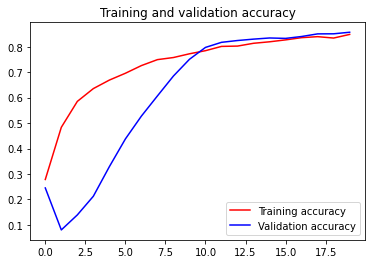

<Figure size 432x288 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt
acc = resnet_history.history['accuracy']
val_acc = resnet_history.history['val_accuracy']
loss = resnet_history.history['loss']
val_loss = resnet_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

Saving clothes1.jpg to clothes1.jpg


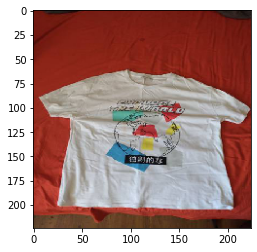

battery: 0.55%
biological: 0.03%
brown-glass: 4.00%
cardboard: 78.91%
clothes: 100.00%
green-glass: 0.05%
metal: 0.33%
paper: 100.00%
plastic: 52.40%
shoes: 8.02%
trash: 0.00%
white-glass: 15.76%


In [16]:
import numpy as np
from google.colab import files
from tensorflow.keras.applications.xception import preprocess_input

labels = train_generator.class_indices.keys()

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  images = np.vstack([x])
  proba = base_model.predict(images)[0]
  plt.imshow(img)
  plt.show()
  for (label, p) in zip(labels, proba):
    print("{}: {:.2f}%".format(label, p * 100))

In [17]:
import tensorflow as tf

# Load the model.
new_model= tf.keras.models.load_model(filepath="gc_resnet.h5")

# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(new_model)
tflite_model = converter.convert()

# Save the TF Lite model.
with tf.io.gfile.GFile('gc_resnet.tflite', 'wb') as f:
  f.write(tflite_model)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /tmp/tmp51a4lecj/assets
